Part one

1. Look at the activation_function and plot the y-values for each x from -5,5 spaced with 0.5.
2. Change the perceptron method from the notebook to use the numpy.dot() method in line 12 instead of the lengthy sum() function.


[-5.  -4.5 -4.  -3.5 -3. ]


[-5, 5, -2, 2]

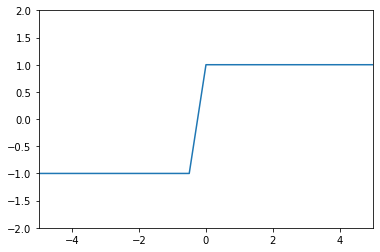

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import estimate_bandwidth, MeanShift

def activation_function(x):
    """
    Step function to respond with y = 1 or -1
    Parameter:
    x: An x (numeric) value that will have a corresponding y value of 1 or -1
    """
    if x < 0:
        return -1
    else:
        return 1
    
rnge = np.linspace(-5.0, 5.0, num=21)
print(rnge[0:5])
values = [activation_function(i) for i in rnge]
plt.plot(rnge, values)
plt.axis([-5, 5, -2, 2])

In [20]:
def perceptron(inp, weights):
    """
    Given a list of input (x) values and a list of weights, 
    calculates the dot product of the 2 lists and returns 1 or -1 (fire or don't)
    Parameters:
    inp: vector of input predictors
    weights: vector of weights to be ajusted for precise prediction of output.
    """
    # This is the same as the dot product np.dot(i, w)
    dot_product = np.dot(inp, weights)
    output = activation_function(dot_product)
    return output

perceptron([1, 2, 3, 4, 5], [1, 1, 2, 1, 1])

1

Part two

1. Make a new scatter plot with datapoints of weights vs heights. Choose different colors for rats and mice
2. Manually find the optimal linear function to divide the 2 groups (y = aX+b). Plot it on the scatter plot
3. What is the slope and intercept of the linear function?
4. Now change the 'type' column to represent rats as 1 and mice as -1
5. Clean up any rows with null data
6. Use these weights herè [40,-190] to determine if the following 3 animals are mice or rats:
    
    [[231.32446731816555,26.03382997978225],
    [17.906954059999567,6.846576762459397],
    [230.276522831171,24.077799766119398]]
    
7. Find the (approximately) optimal weights using the perceptron learning algorithm
8. Plot the weightline
9. Plot the division line


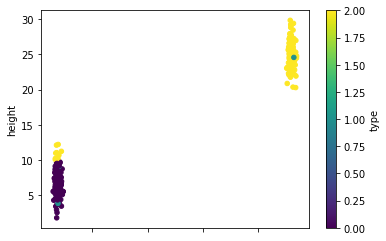

In [68]:
data = pd.read_csv('data.csv', sep=';')

label_enc =preprocessing.LabelEncoder()
data['type'] = label_enc.fit_transform(data['type'].astype(str))
data.plot.scatter(x='weight', y='height',c='type', colormap='viridis')

Slope: 0.04969835645609082
Intercept: 8.665258273404403


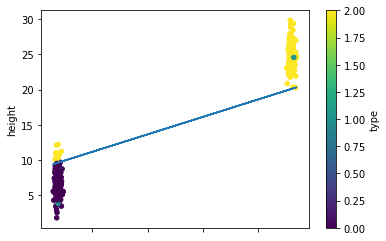

In [136]:
rats = data.loc[data['type']==2]
rats = rats.loc[rats['height']>=15]
mice = data.loc[data['type']==0]
rat = rats.loc[rats['height'].idxmin()]
mouse = mice.loc[mice['height'].idxmax()]


y = mouse['height'] - rat['height']
x = mouse['weight'] - rat['weight']
a = y/x
b = mouse['height'] - a * mouse['weight']


data.plot.scatter(x='weight', y='height',c='type', colormap='viridis')
plt.plot(data['weight'], a*data['weight']+b)
print('Slope: {}\nIntercept: {}'.format(a, b))

In [139]:
data = pd.read_csv('data.csv', sep=';')
data.replace('rat', '1', inplace=True)
data.replace('mouse', '-1', inplace=True)
data.replace(0, np.nan, inplace=True)
data = data.dropna()
data

,weight,height,type
0,233.479920,23.514130,1
1,231.324467,26.033830,1
2,17.906954,6.846577,-1
3,230.276523,24.077800,1
4,20.360593,6.605983,-1
...,...,...,...
244,20.614362,6.575722,-1
245,22.249846,6.951267,-1
246,228.568162,27.146987,1
247,229.002922,23.526073,1


In [156]:
def predict(inp_vec, weights):
    """
    Parameters:
    inp_vec:
        An input vector consisting of rat length and width
    weights:
        A vector of same length as inp_vec, containing a weight for each input
    return:
        A class label, either 1 for 'rat' or -1 for 'mouse'
    """
    class_label_prediction = perceptron(inp_vec, weights)
    return class_label_prediction

weights = [40, -190]
test_data = [[231.32446731816555,26.03382997978225], [17.906954059999567,6.846576762459397], [230.276522831171,24.077799766119398]]

for data in test_data:
    print(predict(data, weights))

1
-1
1
